Faith Busche
ML - CS 584
Final Project - Take Dataset and Use Visualization Strategies

In [1]:
%pip install seaborn
%pip install scikit-learn
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

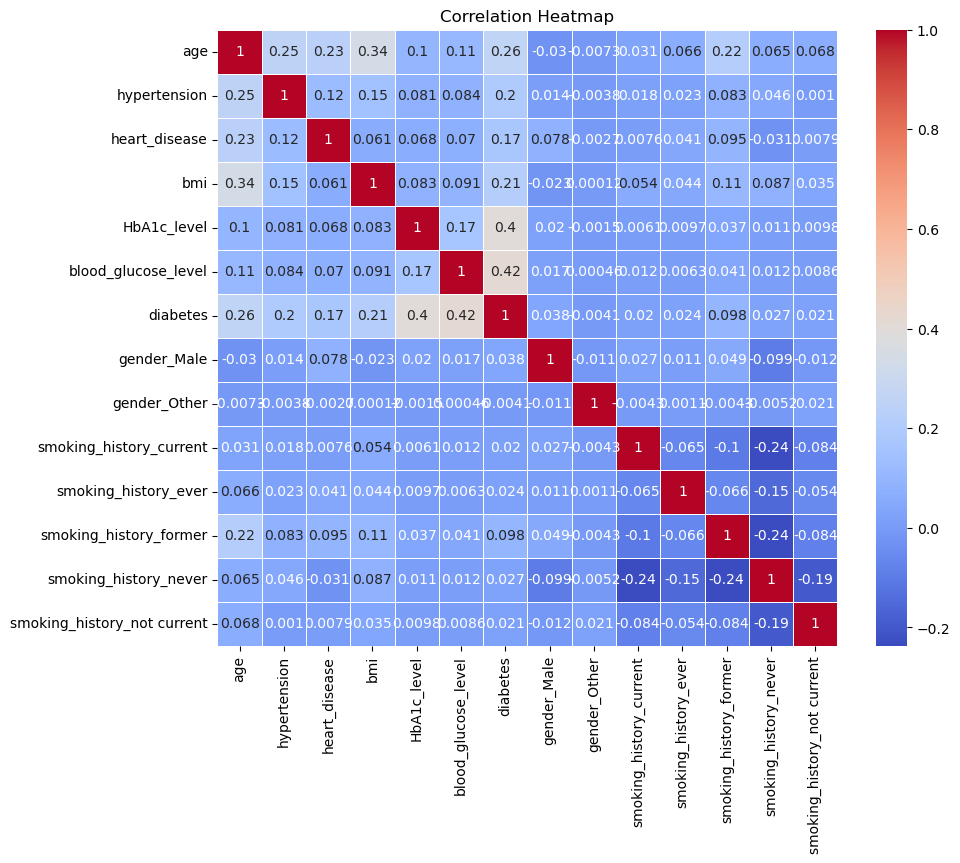

In [3]:
# Load the dataset from the CSV file
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Encode categorical variables (e.g., "gender" and "smoking_history") as numeric values for correlation analysis
df_encoded = pd.get_dummies(df, columns=["gender", "smoking_history"], drop_first=True)

# Compute the correlation matrix and create a correlation heatmap
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

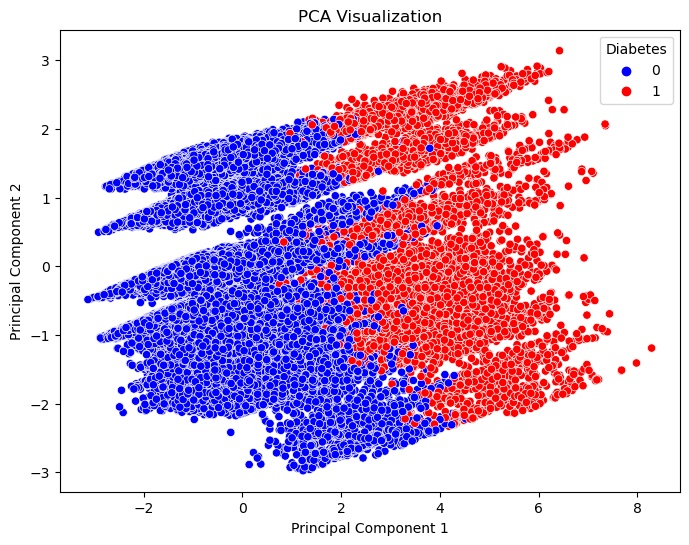

In [4]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for 2D visualization
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame for the reduced data
df_pca = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])

# Add back the "diabetes" column for color-coding the plot
df_pca["diabetes"] = df["diabetes"]

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", data=df_pca, hue="diabetes", palette=["blue", "red"])
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Diabetes", loc="upper right")
plt.show()

In [5]:
# After fitting the PCA model
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Access the loadings (weights) of the original features for PC1 and PC2
loadings = pca.components_

# Create a DataFrame to display the feature labels and their corresponding weights for PC1 and PC2
loadings_df = pd.DataFrame(loadings, columns=df_encoded.columns, index=["PC1", "PC2"])
print("Loadings (Weights) for PC1 and PC2:")
print(loadings_df)

Loadings (Weights) for PC1 and PC2:
          age  hypertension  heart_disease       bmi  HbA1c_level  \
PC1  0.432693      0.311909       0.269842  0.342275     0.326208   
PC2 -0.021239      0.037697      -0.156879  0.077616     0.095355   

     blood_glucose_level  diabetes  gender_Male  gender_Other  \
PC1             0.340085  0.502541     0.039212     -0.007057   
PC2             0.098685  0.092105    -0.293290     -0.006193   

     smoking_history_current  smoking_history_ever  smoking_history_former  \
PC1                 0.022351              0.051876                0.212430   
PC2                -0.321030             -0.172097               -0.340143   

     smoking_history_never  smoking_history_not current  
PC1               0.010828                     0.029739  
PC2               0.751046                    -0.204147  


/Users/faithbusche/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


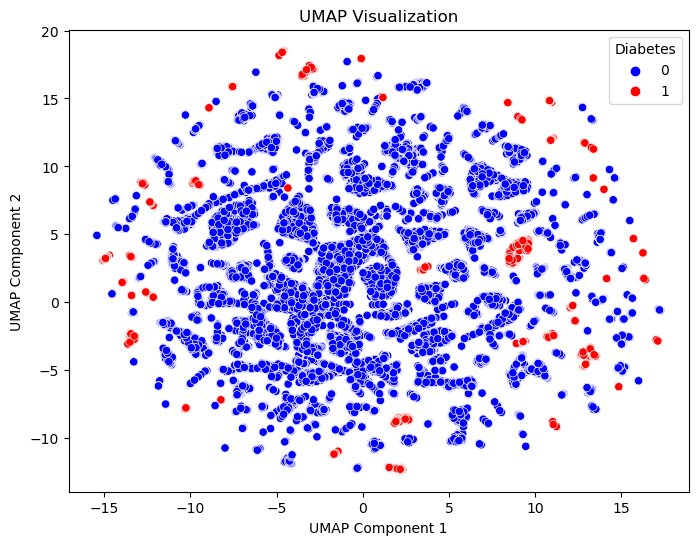

In [6]:
# Load the dataset from the CSV file
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Encode categorical variables (e.g., "gender" and "smoking_history") as numeric values for UMAP
df_encoded = pd.get_dummies(df, columns=["gender", "smoking_history"], drop_first=True)

# Standardize the data (important for UMAP)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform UMAP
umap_model = umap.UMAP(n_components=2)  # Reduce to 2 dimensions for 2D visualization
umap_result = umap_model.fit_transform(df_scaled)

# Create a DataFrame for the reduced data
df_umap = pd.DataFrame(data=umap_result, columns=["UMAP1", "UMAP2"])

# Add back the "diabetes" column for color-coding the plot
df_umap["diabetes"] = df["diabetes"]

# Create a scatter plot of the UMAP visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", data=df_umap, hue="diabetes", palette=["blue", "red"])
plt.title("UMAP Visualization")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="Diabetes", loc="upper right")
plt.show()

In [8]:
# Load the dataset from the CSV file
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Assuming 'X' contains the features and 'y' contains the target variable ('diabetes')
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=["gender", "smoking_history"], drop_first=True)

# Define the number of folds (k)
k = 5

# Initialize the k-fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the classifier (replace with the classifier of your choice)
classifier = RandomForestClassifier()

# Initialize PCA
pca = PCA(n_components=2)

# Perform k-fold cross-validation
fold_accuracies = []
for train_index, test_index in kf.split(X_encoded):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply PCA to the training and test data
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Fit the model on the training data
    classifier.fit(X_train_pca, y_train)

    # Make predictions on the test data
    predictions = classifier.predict(X_test_pca)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, predictions)
    fold_accuracies.append(accuracy)

# Print the accuracy for each fold
for i, accuracy in enumerate(fold_accuracies, 1):
    print(f"Fold {i} Accuracy: {accuracy}")

# Calculate and print the average accuracy across all folds
average_accuracy = sum(fold_accuracies) / k
print(f"\nAverage Accuracy: {average_accuracy}")

Fold 1 Accuracy: 0.9401
Fold 2 Accuracy: 0.94015
Fold 3 Accuracy: 0.938
Fold 4 Accuracy: 0.9433
Fold 5 Accuracy: 0.93825

Average Accuracy: 0.9399599999999999
